# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from itertools import product 
from sklearn.linear_model import LinearRegression

## 1. Introduction to Linear Regression

**Task 1**  
- Run the code.
- This shows Sandra’s lemonade stand’s revenue over its first 12 months of being open.

<br>

**Task 2**  
- From eyeballing the graph, what do you think the revenue in month 13 would be?
- Enter your approximate answer as an integer in a variable called `month_13`.

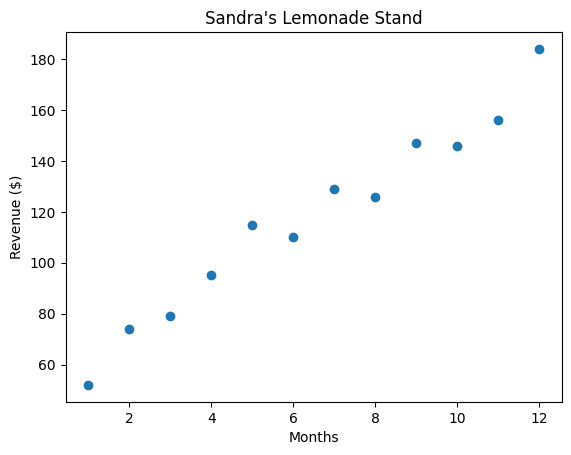

In [3]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

In [4]:
month_13 = 200

## 2. Points and Lines

**Task 1**  
- We have provided a slope, `m`, and an intercept, `b`, that seems to describe the revenue data you have been given.
- Create a new list, `y`, that has every element in `months`, multiplied by `m` and added to `b`.
- A list comprehension is probably the easiest way to do this!

<br>

**Task 2**  
- Plot the `y` values against `months` as a line on top of the scatterplot that was plotted with the line `plt.plot(months, revenue, "o")`.

<br>

**Task 3**  
- Change `m` and `b` to the values that you think match the data the best.
- What does the slope look like it should be? And the intercept?

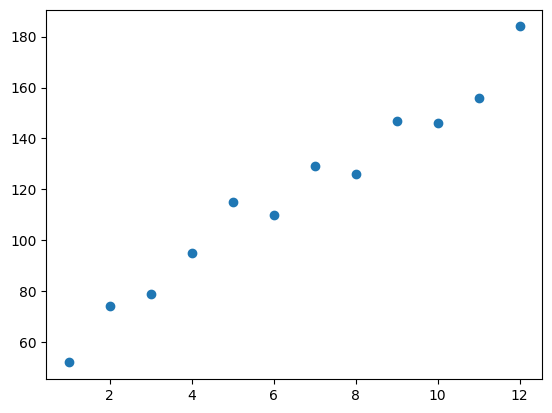

In [5]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 8
#intercept:
b = 40

plt.plot(months, revenue, "o")
plt.show()

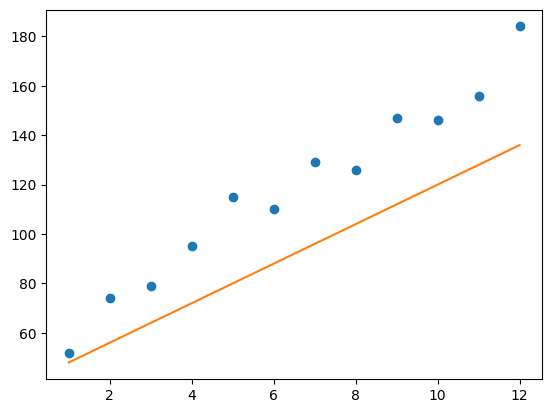

In [6]:
# Task 1
y = [m*x + b for x in months]

# Task 2
plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()

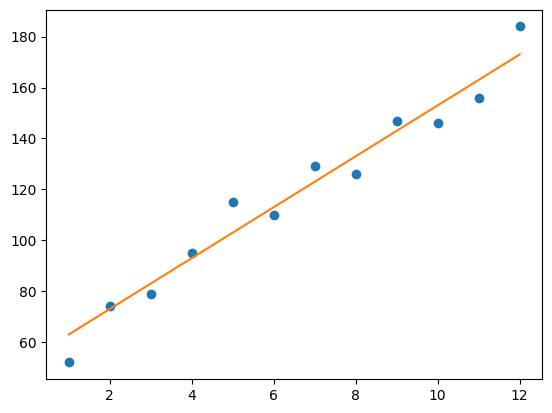

In [7]:
# Task 3
m = 10
b = 53
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)
plt.show()

## 3. Loss

**Task 1**  
- We have three points, (1, 5), (2, 1), and (3, 3). 
- We are trying to find a line that produces lowest loss.
- We have provided you the list of x-values, `x`, and y-values, `y`, for these points.
- Find the y-values that the line with weights `m1` and `b1` would predict for the x-values given. 
- Store these in a list called `y_predicted1`.

<br>

**Task 2**  
- Find the y values that the line with weights `m2` and `b2` would predict for the x-values given. Store these in a list called `y_predicted2`.

<br>

**Task 3**  
- Create a variable called `total_loss1` and set it equal to zero.
- Then, find the sum of the squared distance between the actual y-values of the points and the `y_predicted1` values by looping through the list:
    - Calculating the difference between `y` and `y_predicted1`
    - Squaring the difference
    - Adding it to `total_loss1`

<br>

**Task 4**  
- Create a variable called `total_loss2` and set it equal to zero.
- Find the sum of the squared distance between the actual y-values of the points and the `y_predicted2` values by looping through the list:
    - Calculating the difference between `y` and `y_predicted2`
    - Squaring the difference
    - Adding it to `total_loss2`

<br>

**Task 5**  
- Print out `total_loss1` and `total_loss2`. 
- Out of these two lines, which would you use to model the points?
- Create a variable called `better_fit` and assign it to `1` if line 1 fits the data better and `2` if line 2 fits the data better.

In [8]:
x = [1, 2, 3]
y = [5, 1, 3]

# y = mx + b

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

In [9]:
# Task 1
y_predicted1 = [m1*x + b1 for x in x]

# Task 2
y_predicted2 = [m2*x + b2 for x in x]

# Task 3
total_loss1 = 0
for y_real, y_pred in zip(y, y_predicted1):
    total_loss1 += (y_real - y_pred) ** 2

# Task 4
total_loss2 = 0
for y_real, y_pred in zip(y, y_predicted2):
    total_loss2 += (y_real - y_pred) ** 2

# Task 5
print(total_loss1)
print(total_loss2)
better_fit = 2

17
13.5


## 4 Minimizing Loss

100%|██████████| 10201/10201 [00:00<00:00, 170472.72it/s]


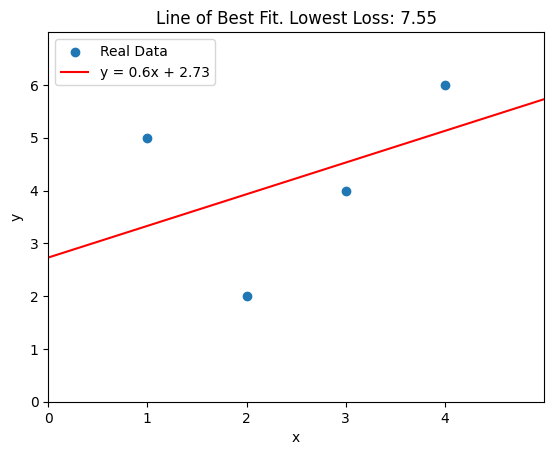

In [62]:
x = [1, 2, 3, 4]
y = [5, 2, 4, 6]


m_vals = np.linspace(-10, 10, 101)  # create a range of m values
b_vals = np.linspace(0, 7, 101) # create a range of b values

comb = list(product(m_vals, b_vals)) # create all possible combinations of m and b
loss_dict = {} # Hold the loss for each combination

# Calculate the loss for each combination
with tqdm(comb) as iterator:
    for m, b in iterator:
        y_predicted = [m*x + b for x in x]
        total_loss = 0
        for y_real, y_pred in zip(y, y_predicted):
            total_loss += (y_real - y_pred) ** 2
        loss_dict[(m, b)] = total_loss

# Find the combination with the minimum loss
min_loss_param = min(loss_dict, key=loss_dict.get)  # get the key (m, b) with the minimum loss
min_loss = loss_dict[min_loss_param]                # get the minimum loss

# Plot the data and the line of best fit
x_vals = np.linspace(0, 5, 6)
plt.scatter(x, y, label="Real Data")
plt.plot(x_vals, [min_loss_param[0]*x + min_loss_param[1] for x in x_vals], c='r', label=f"y = {np.round(min_loss_param[0], 2)}x + {np.round(min_loss_param[1], 2)}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Line of Best Fit. Lowest Loss: {np.round(min_loss, 2)}")
ax = plt.gca()
ax.set_xlim(0, np.max(x) + 1)
ax.set_xticks(np.arange(0, np.max(x)+1))
ax.set_ylim(0, np.max(y) + 1)
ax.set_yticks(np.arange(0, np.max(y)+1))
plt.show()

## 5. Gradient Descent for Intercept

**Task 1**  
- Define a function called `get_gradient_at_b()` that takes in a set of x values, `x`, a set of y values, `y`, a slope `m`, and an intercept value `b`.
- For now, have it return `b`, unchanged.

<br>

**Task 2**  
- In the `get_gradient_at_b()` function, we want to go through all of the `x` values and all of the `y` values and compute `(y - (m*x+b))` for each of them.
- Create a variable called `diff` that has the sum of all of these values.
- Instead of returning `b` from the `get_gradient_at_b()` function, return `diff`.

<br>

**Task 3**  
- Still in the `get_gradient_at_b()` function, define a variable called `b_gradient` and set it equal to the `-2/N` multiplied by `diff`.
- Note: `N` is the number of points, i.e. the length of the `x` list or the `y` list.
- Instead of returning `diff`, return `b_gradient`.

In [2]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    for x_val, y_val in zip(x, y):
        diff += y_val - ((m * x_val) + b) 
    b_gradient = -2/len(x) * diff
    return b_gradient

## 6. Gradient Descent for Slope

**Task 1**  
- Define a function called `get_gradient_at_m()` that takes in a set of x values, `x`, a set of y values, `y`, a slope `m`, and an intercept value `b`.
- For now, have it return `m`.

<br>

**Task 2**  
- In this function, we want to go through all of the `x` values and all of the `y` values and compute `x*(y - (m*x+b))` for each of them.
- Create a variable called `diff` that has the sum of all of these values, and return it from the function.

<br>

**Task 3**  
- Define a variable called `m_gradient` and set it equal to the `-2/N` multiplied by `diff`.
- Instead of returning `diff`, return `m_gradient`.

In [3]:
def get_gradient_at_b(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
        y_val = y[i]
        x_val = x[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -2/N * diff
    return b_gradient

In [4]:
def get_gradient_at_m(x, y, m, b):
    diff = 0
    for x_vals, y_vals in zip(x, y):
        diff += x_vals * (y_vals - ((m * x_vals) + b))
    m_gradient = -2/len(x) * diff
    return m_gradient

## 7. Put it Together

**Task 1**  
- Define a function called `step_gradient()` that takes in `x`, `y`, `b_current`, and `m_current`.
- This function will find the gradients at `b_current` and `m_current`, and then return new `b` and `m` values that have been moved in that direction.
- For now, just return the pair (`b_current`, `m_current`).

<br>

**Task 2**  
- Inside `step_gradient()`, find the gradient at `b_current` and the gradient at `m_current` using the functions defined before (`get_gradient_at_b` and `get_gradient_at_m`).
- Store these gradients in variables called `b_gradient` and `m_gradient`, and return these from the function instead of `b_current` and `m_current`.
- Return them as a list.

<br>

**Task 3**  
- Let’s try to move the parameter values in the direction of the gradient at a rate of `0.01`.
- Create variables called `b` and `m`:
    - b should be `b_current - (0.01 * b_gradient)`
    - m should be `m_current - (0.01 * m_gradient)`
- Return the pair `b` and `m` from the function.

<br>

**Task 4**  
- We have provided Sandra’s lemonade data once more. 
- We have a guess for what we think the `b` and `m` might be.
- Call your function to perform one step of gradient descent. 
- Store the results in the variables `b` and `m`.
- We have a way to step to new `b` and `m` values! 
- Next, we will call this function a bunch, in order to move those values towards lower and lower loss.

In [5]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient


def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

# Define your step_gradient function here
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    print(b_gradient)
    b = b_current - 0.01 * b_gradient
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    print(m_gradient)
    m = m_current - 0.01 * m_gradient
    return (b, m)

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m)
print(b, m)

-235.5
-1778.3333333333333
2.355 17.78333333333333


## 10. Putting it Together II 

**Task 1**  
- We have all of the functions we have defined throughout the lesson.
- Now, let’s create a function called `gradient_descent()` that takes in `x`, `y`, `learning_rate`, and a `num_iterations`.
- For now, return `[-1,-1]`.

<br>

**Task 2**  
- In the function `gradient_descent()`, create variables `b` and `m` and set them both to zero for our initial guess.
- Return `b` and `m` from the function.

<br>

**Task 3**  
- Update your `step_gradient()` function to take in the parameter `learning_rate` (as the last parameter) and replace the `0.01`s in the calculations of `b_gradient` and `m_gradient` with `learning_rate`.

<br>

**Task 4**  
- Let’s go back and finish the `gradient_descent()` function.
- Create a loop that runs `num_iterations` times. At each step, it should:
    - Call `step_gradient()` with `b`, `m`, `x`, `y`, and `learning_rate`
    - Update the values of `b` and `m` with the values `step_gradient()` returns.

<br>

**Task 5**  
- Outside of the function, uncomment the line that calls `gradient_descent` on months and revenue, with a learning rate of `0.01` and `1000` iterations.
- It stores the results in variables called `b` and `m`.

<br>

**Task 6**  
- Uncomment the lines that will plot the result.

49.60215351339813 10.463427732364998


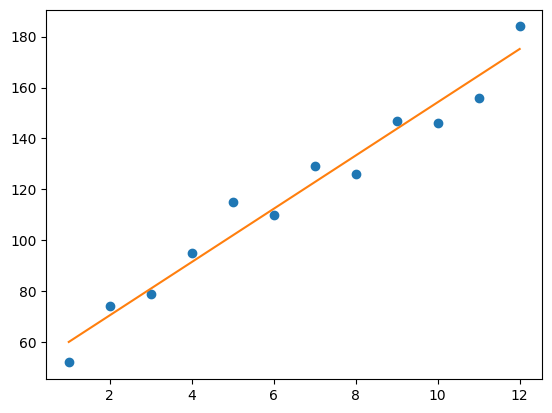

In [ ]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return b, m

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)
print(b, m)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y, label=f"y = {np.round(m, 2)}x + {np.round(b, 2)}")
plt.xlabel("Months")
plt.ylabel("Revenue ($)")
plt.title("Sandra's Lemonade Stand")
plt.legend()
plt.show()

## 11. Use Your Functions on Real Data

**Task 1**  
- Run the code-
- This is a scatterplot of weight vs height.

<br>

**Task 2**  
- We have imported your gradient_descent() function. Call it with parameters:
    - X
    - y
    - `num_iterations` of `1000`
    - `learning_rate` of `0.0001`
- Store the result in variables called `b` and `m`.

<br>

**Task 3**  
- Create a list called `y_predictions`. 
- Set it to be every element of `X` multiplied by `m` and added to `b`.
- The easiest way to do this would be a list comprehension:
    ```python	
    new_y = [elment*slope + intercept for element in y]
    ```

<br>

**Task 4**  
- Plot `X` vs `y_predictions` on the same plot as the scatterplot.
- Does the line look right?

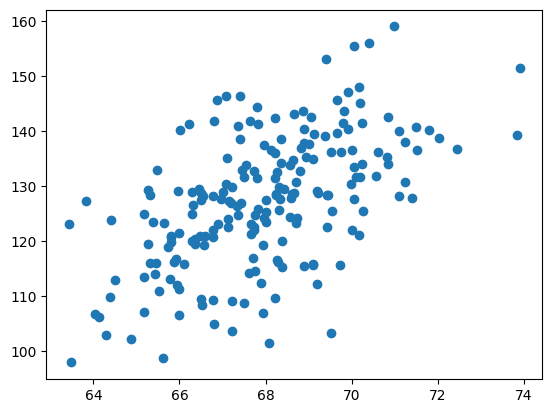

In [91]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b, m]


df = pd.read_csv("heights.csv")

X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')
plt.show()

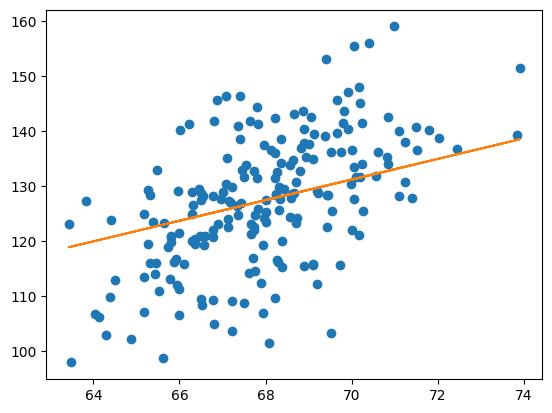

In [97]:
b, m = gradient_descent(X, y, 0.0001, 1000)
y_predictions = [m*x+b for x in X]

plt.plot(X, y, 'o')
#plot your line here:
plt.plot(X, y_predictions)
plt.show()

## 12. Scikit-Learn

**Task 1**  
- We have imported a dataset of soup sales data vs temperature.
- Run the code to see the scatterplot. Can you envision the line that would fit this data?

<br>

**Task 2**  
- Create an sklearn `linear` regression model and call it `line_fitter`.

<br>

**Task 3**  
- Fit the `line_fitter` object to `temperature` and `sales`.

<br>

**Task 4**  
- Create a list called `sales_predict` that is the predicted sales values that `line_fitter` would generate from the `temperature` list.

<br>

**Task 5**  
- Plot `sales_predict` against temperature as a line, on the same plot as the scatterplot.

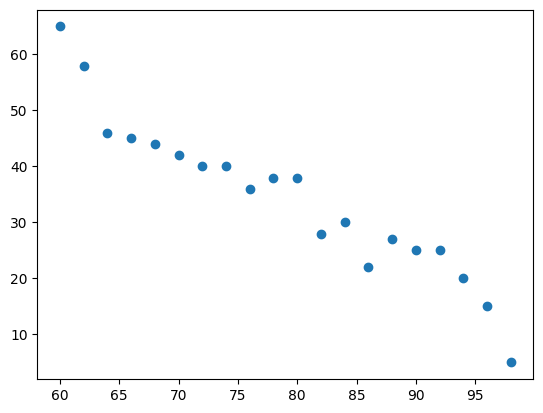

In [99]:
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')
plt.show()

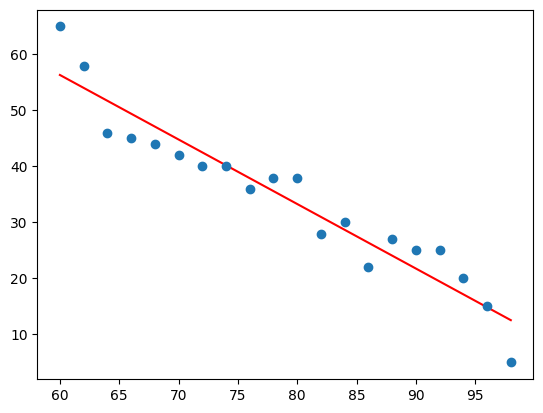

In [104]:
# Task 2
line_fitter = LinearRegression()

# Task 3
line_fitter.fit(temperature, sales)

# Task 4
sales_predict = line_fitter.predict(temperature)

# Task 5
plt.plot(temperature, sales_predict, c='r')
plt.plot(temperature, sales, 'o')
plt.show()

## 13. Review

**California Housing Dataset**:  


**Number of Instances**: 20640  
**Number of Attributes**: 8 numeric, predictive attributes and the target  
**Attribute Information**:  
- `MedInc` median income in block group  
- `HouseAge` median house age in block group  
- `AveRooms` average number of rooms  
- `AveBedrms` average number of bedrooms  
- `Population` block group population  
- `AveOccup` average house occupancy  
- `Latitude` block group latitude  
- `Longitude` block group longitude   
 
**Missing Attribute Values**: None

In [107]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(20640,) (20640,)


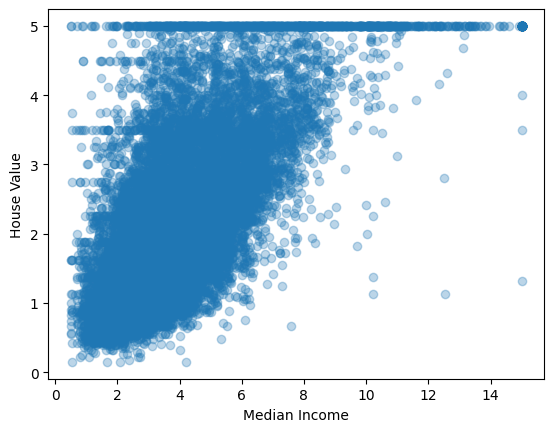

In [117]:
X = df.MedInc
y = california.target

print(X.shape, y.shape)

plt.scatter(X, y, alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()

In [125]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [ ]:
# coef = m, intercept = b
model.coef_, model.intercept_

(array([0.41793849]), np.float64(0.45085576703267827))

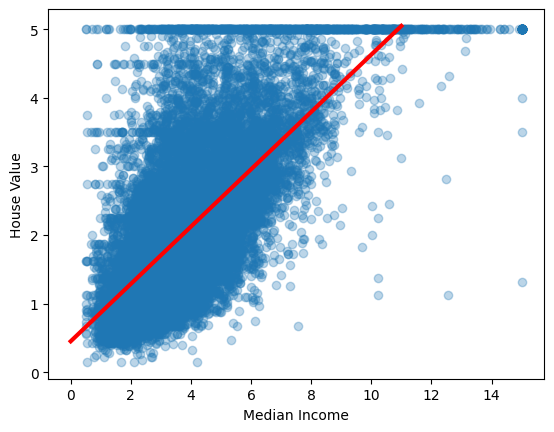

In [131]:
x_vals = np.linspace(0, 11, 100)
y_vals = model.predict(x_vals.reshape(-1,1))

plt.scatter(X, y, alpha=0.3)
plt.plot(x_vals, y_vals, c='r', linewidth=3)
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()